# Статистичні методи
Індивідуальне завдання 1

Токарєв Павло, МФ-51

In [1]:
from functools import reduce
from typing import NamedTuple
Point = NamedTuple("Point", (("x", int), ("y", int)))

## Вхідні дані

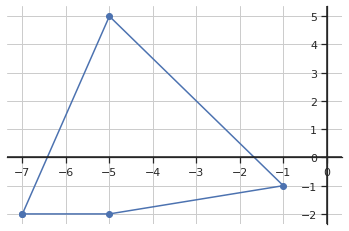

In [2]:
%matplotlib inline

#points = [Point(-2, 2), Point(2,4), Point(5,0), Point(1,-1)]
points = [Point(-7, -2), Point(-5, 5), Point(-1, -1), Point(-5, -2)]
A1, A2, A3, A4 = points


import matplotlib.pyplot as plt
import seaborn
seaborn.set(style='ticks')

fig, ax = plt.subplots()
ax.plot(*zip(*points, points[0]), '-o')
ax.grid(True, which='both')

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

# set the x-spine (see below for more info on `set_position`)
ax.spines['left'].set_position('zero')

# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()
plt.show()

Обчислимо рівняння прямих для точек.

In [3]:
import sympy
x,y,c = sympy.symbols("x y c")
ws = [(f.y-s.y)*x+(s.x-f.x)*y+(f.x*s.y-s.x*f.y) 
      for f,s in zip(points, points[1:]+[points[0]])]
ws

[-7*x + 2*y - 45, 6*x + 4*y + 10, x - 4*y - 3, -2*y - 4]

Побудуємо функцію $f$ - добуток усіх рівнянь прямих.

In [4]:
f = reduce(lambda x,y: x*y, ws); f

(-2*y - 4)*(-7*x + 2*y - 45)*(x - 4*y - 3)*(6*x + 4*y + 10)

Для інтегрування нам потрібні верхні та нижні границі $y$: виведемо їх з рівнянь прямих.

In [5]:
from sympy.solvers import solve
w1,w2,w3,w4=ws
sw1,sw2,sw3,sw4=map(lambda ff: solve(ff, y)[0],ws)

Наша функція не нормалізована: для цього знайдемо інтеграл по області та поділимо функцію на його значення.

In [6]:
e = sympy.integrate(sympy.integrate(f, (y, sw4, sw1)), (x, A1.x, A4.x))+\
sympy.integrate(sympy.integrate(f, (y, sw3, sw1)), (x, A4.x, A2.x))+\
sympy.integrate(sympy.integrate(f, (y, sw3, sw2)), (x, A2.x, A3.x))
e

430808/5

In [7]:
c_result = 1/e
c_result

5/430808

In [8]:
f = c_result*f
f

5*(-2*y - 4)*(-7*x + 2*y - 45)*(x - 4*y - 3)*(6*x + 4*y + 10)/430808

Побудуємо графік отриманої густини розподілу.

In [9]:
g = sympy.Piecewise((0, w1>0), (0, w2 > 0), (0, w3 > 0), (0, w4 > 0), (f, True))
g

Piecewise((0, (2*y + 4 < 0) | (6*x + 4*y + 10 > 0) | (-x + 4*y + 3 < 0) | (7*x - 2*y + 45 < 0)), (5*(-2*y - 4)*(-7*x + 2*y - 45)*(x - 4*y - 3)*(6*x + 4*y + 10)/430808, True))

/home/paulra/Code/sympy/sympy/plotting/experimental_lambdify.py:165: UserWarning: The evaluation of the expression is problematic. We are trying a failback method that may still work. Please report this as a bug.
  warnings.warn('The evaluation of the expression is'


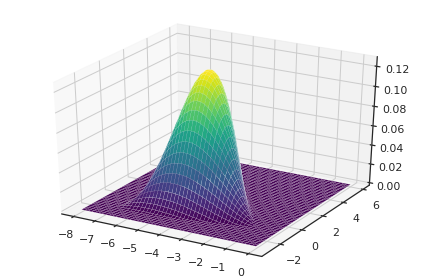

In [10]:
sympy.plotting.plot3d(g, (x, A1.x-1, A3.x+1), (y, A4.y-1, A2.y+1))

Знайдемо густину $f_x$ як інтеграл густини по $y$.

In [11]:
p1 = sympy.integrate(f, (y, sw4, sw1))
p2 = sympy.integrate(f, (y, sw3, sw1))
p3 = sympy.integrate(f, (y, sw3, sw2))
f_x  = sympy.Piecewise(
    (0, x<=A1.x),
    (p1, x<=A4.x),
    (p2, x<=A2.x),
    (p3, x<=A3.x),
    (0, True),
)
f_x

Piecewise((0, x <= -7), (15*x**3/7693 + 2365*x**2/161553 + 535*x/53851 + (-45*x/107702 - 345/107702)*(7*x/2 + 45/2)**4 + 8*(7*x/2 + 45/2)**5/53851 + (7*x/2 + 45/2)**3*(-190*x**2/161553 - 580*x/53851 - 4390/161553) + (7*x/2 + 45/2)**2*(15*x**3/30772 - 225*x**2/215404 - 1095*x/30772 - 14775/215404) + (7*x/2 + 45/2)*(15*x**3/7693 + 535*x**2/53851 - 1425*x/53851 - 3375/53851) - 1997/161553, x <= -5), (8*(-3*x/2 - 5/2)**5/53851 + (-3*x/2 - 5/2)**4*(-45*x/107702 - 345/107702) + (-3*x/2 - 5/2)**3*(-190*x**2/161553 - 580*x/53851 - 4390/161553) + (-3*x/2 - 5/2)**2*(15*x**3/30772 - 225*x**2/215404 - 1095*x/30772 - 14775/215404) + (-3*x/2 - 5/2)*(15*x**3/7693 + 535*x**2/53851 - 1425*x/53851 - 3375/53851) - (-45*x/107702 - 345/107702)*(x/4 - 3/4)**4 - 8*(x/4 - 3/4)**5/53851 - (x/4 - 3/4)**3*(-190*x**2/161553 - 580*x/53851 - 4390/161553) - (x/4 - 3/4)**2*(15*x**3/30772 - 225*x**2/215404 - 1095*x/30772 - 14775/215404) - (x/4 - 3/4)*(15*x**3/7693 + 535*x**2/53851 - 1425*x/53851 - 3375/53851), x <= -1

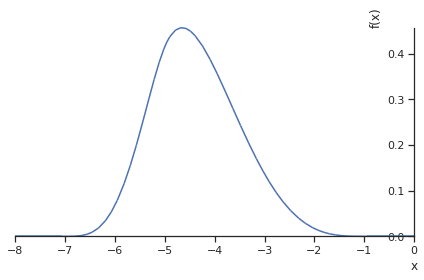

In [12]:
sympy.plotting.plot(f_x, (x, A1.x-1,A3.x+1))

Знайдемо кумулятивну функцію розподілу $F_x$.

In [13]:
t = sympy.symbols("t")
F_x = sympy.integrate(f_x, (x, A1.x, t)).subs(t, x)
F_x

Piecewise((0, x < -7), (-829*Min(-5, x)**6/160768 - 15483*Min(-5, x)**5/80384 - 493755*Min(-5, x)**4/160768 - 1051525*Min(-5, x)**3/40192 - 19963875*Min(-5, x)**2/160768 - 24916875*Min(-5, x)/80384 + 437*Min(-1, x)**6/1446912 + 235*Min(-1, x)**5/80384 + 3265*Min(-1, x)**4/482304 + 1405*Min(-1, x)**3/361728 - 685*Min(-1, x)**2/160768 - 1423*Min(-1, x)/241152 - 28627123/90432, True))

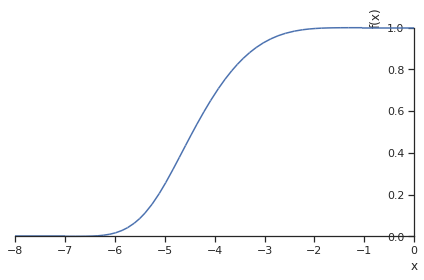

In [14]:
sympy.plotting.plot(F_x, (x, A1.x-1, A3.x+1))

## Генерація

Щоб згенерувати значення даної випадкової величини потрібно знайти обернену функцію кумулятивної функції розподілу.
Тут це зроблено за допомогою сплайнової апроксимації першого порядку, що дає кусочно-лінійну функцію яку ми будемо вважати за достатньо гарне наближення до $F^{-1}_x$. 

In [15]:
N = 20
step = (A3.x- A1.x)/N
a = sympy.lambdify([x], F_x)
approximation_points = []
current = A1.x
while current < A3.x:
    v = float(a(current))
    approximation_points.append(Point(v, current))
    current+=step
approximation_points

[Point(x=1.1937117960769683e-12, y=-7),
 Point(x=8.470551370010071e-05, y=-6.7),
 Point(x=0.0017374585993366054, y=-6.4),
 Point(x=0.01015731777391693, y=-6.1000000000000005),
 Point(x=0.03459301910771728, y=-5.800000000000001),
 Point(x=0.08611321904874103, y=-5.500000000000001),
 Point(x=0.17282871974521186, y=-5.200000000000001),
 Point(x=0.2925860201846149, y=-4.900000000000001),
 Point(x=0.42825969426775146, y=-4.600000000000001),
 Point(x=0.5617095600930497, y=-4.300000000000002),
 Point(x=0.6814104796976608, y=-4.000000000000002),
 Point(x=0.7812449196172793, y=-3.700000000000002),
 Point(x=0.8591624968154861, y=-3.400000000000002),
 Point(x=0.9159980501905238, y=-3.1000000000000023),
 Point(x=0.9544482376594488, y=-2.8000000000000025),
 Point(x=0.9782066588190901, y=-2.5000000000000027),
 Point(x=0.9912575031848974, y=-2.200000000000003),
 Point(x=0.9973277240061407, y=-1.9000000000000028),
 Point(x=0.9994977376593965, y=-1.6000000000000028),
 Point(x=0.9999706486181026, y=-1.3

In [16]:
F_inv_x = sympy.interpolating_spline(1, x, *zip(*approximation_points))
F_inv_x

Piecewise((3541.6821305151*x - 7.00000000422775, (x >= 1.19371179607697e-12) & (x <= 8.47055137001007e-5)), (181.515316841454*x - 6.71537534815749, (x >= 8.47055137001007e-5) & (x <= 0.00173745859933661)), (35.6300495981815*x - 6.46190573606915, (x >= 0.00173745859933661) & (x <= 0.0101573177739169)), (12.2771184629364*x - 6.22470259357607, (x >= 0.0101573177739169) & (x <= 0.0345930191077173)), (5.82295876847171*x - 6.00143372394119, (x >= 0.0345930191077173) & (x <= 0.086113219048741)), (3.45958908834633*x - 5.7979163529834, (x >= 0.086113219048741) & (x <= 0.172828719745212)), (2.50506648779878*x - 5.6329474339629, (x >= 0.172828719745212) & (x <= 0.292586020184615)), (2.21118799964222*x - 5.5469626966953, (x >= 0.292586020184615) & (x <= 0.428259694267751)), (2.24803523139346*x - 5.56274288089969, (x >= 0.428259694267751) & (x <= 0.56170956009305)), (2.50624640972636*x - 5.70778256829218, (x >= 0.56170956009305) & (x <= 0.681410479697661)), (3.00497503909016*x - 6.04762148286592, (

Побудуймо її графік: як видно, апроксимація схожа на оригінал.

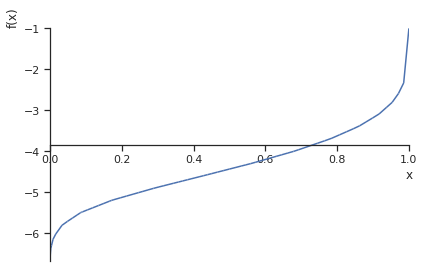

In [17]:
sympy.plotting.plot(F_inv_x, (x, 0, 1))

In [18]:
f_n = g/f_x
f_n

Piecewise((0, (2*y + 4 < 0) | (6*x + 4*y + 10 > 0) | (-x + 4*y + 3 < 0) | (7*x - 2*y + 45 < 0)), (5*(-2*y - 4)*(-7*x + 2*y - 45)*(x - 4*y - 3)*(6*x + 4*y + 10)/430808, True))*Piecewise((zoo, x <= -7), (1/(15*x**3/7693 + 2365*x**2/161553 + 535*x/53851 + (-45*x/107702 - 345/107702)*(7*x/2 + 45/2)**4 + 8*(7*x/2 + 45/2)**5/53851 + (7*x/2 + 45/2)**3*(-190*x**2/161553 - 580*x/53851 - 4390/161553) + (7*x/2 + 45/2)**2*(15*x**3/30772 - 225*x**2/215404 - 1095*x/30772 - 14775/215404) + (7*x/2 + 45/2)*(15*x**3/7693 + 535*x**2/53851 - 1425*x/53851 - 3375/53851) - 1997/161553), x <= -5), (1/(8*(-3*x/2 - 5/2)**5/53851 + (-3*x/2 - 5/2)**4*(-45*x/107702 - 345/107702) + (-3*x/2 - 5/2)**3*(-190*x**2/161553 - 580*x/53851 - 4390/161553) + (-3*x/2 - 5/2)**2*(15*x**3/30772 - 225*x**2/215404 - 1095*x/30772 - 14775/215404) + (-3*x/2 - 5/2)*(15*x**3/7693 + 535*x**2/53851 - 1425*x/53851 - 3375/53851) - (-45*x/107702 - 345/107702)*(x/4 - 3/4)**4 - 8*(x/4 - 3/4)**5/53851 - (x/4 - 3/4)**3*(-190*x**2/161553 - 580*x/

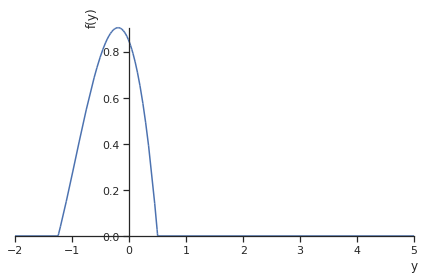

In [19]:
sympy.plotting.plot(f_n.subs(x,-2), (y, A4.y, A2.y))

Наступний алгоритм генерує значення двомірної випадкової величини та записує їх до масиву.

In [20]:
sf_n = sympy.lambdify([x,y], f_n, "math")
def lower_bound(v: float) -> float:
    if A1.x <= v <= A4.x:
        return sw4.evalf(subs={x:v})
    if A4.x <= v <= A3.x:
        return sw3.evalf(subs={x:v})
    raise ValueError(v)

def upper_bound(v: float) -> float:
    if A1.x <= v <= A2.x:
        return sw1.evalf(subs={x:v})
    if A2.x <= v <= A3.x:
        return sw2.evalf(subs={x:v})
    raise ValueError(v)

def maximum(xv:float, left:float,right:float) -> float:
    samples = []
    S = 10
    yv = left
    step = (right-left)/S
    while yv < right:
        samples.append(float(sf_n(xv,yv)))
        yv+=step
    
    return max(samples)+0.1

from numpy.random import random
K = 200
i = 0
sF_inv_x = sympy.lambdify(x, F_inv_x, "math")
surface_points = []
while i < K:
    inv_x = random()
    xv = sF_inv_x(inv_x)
    
    if xv < (A1.x+0.1) or xv > (A3.x-0.1):
        continue
    i+=1
    left, right = lower_bound(xv), upper_bound(xv)
    m = maximum(xv, left, right)
    while True:
        yv, zv = (right - left) * random() + left, m * random()
        rzv = float(f_n.evalf(subs={x:xv,y:yv}))
        if zv <= rzv:
            surface_points.append(Point(xv,yv))
            break
surface_points

[Point(x=-4.320723705914972, y=1.07536715986019),
 Point(x=-3.1138220189830887, y=0.205186611573899),
 Point(x=-2.800534618512094, y=-0.147773522375865),
 Point(x=-4.992492760276881, y=2.26887353318217),
 Point(x=-4.765713929454916, y=1.30606856198233),
 Point(x=-5.109776670764681, y=-0.294712791924695),
 Point(x=-2.1668375140485026, y=-0.689157265105522),
 Point(x=-5.09619513078432, y=-0.819583320145629),
 Point(x=-2.475302959786614, y=0.230747499011493),
 Point(x=-4.923889735134749, y=3.53383815962474),
 Point(x=-3.753383094606186, y=2.19763489800431),
 Point(x=-3.516584966032317, y=1.72123044219027),
 Point(x=-5.301995739823307, y=2.23176008395539),
 Point(x=-4.006579545721217, y=2.61805389735651),
 Point(x=-4.0308143938061445, y=-0.0731192313252882),
 Point(x=-3.968832718158997, y=0.164474376560539),
 Point(x=-5.632525550859318, y=1.20566654049634),
 Point(x=-3.6169035756104972, y=0.747557590707857),
 Point(x=-5.60344086515156, y=2.21695140460711),
 Point(x=-4.619711683158207, y=2.

Побудуємо плаский та об'ємний графіки використовуючи згенеровані дані.

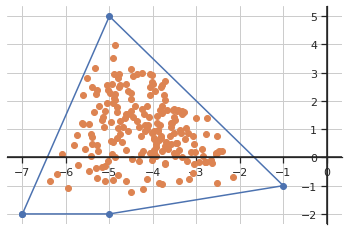

In [21]:
fig, ax = plt.subplots()
ax.plot(*zip(*points, points[0]), '-o')
ax.plot(*zip(*surface_points), 'o')
ax.grid(True, which='both')

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

# set the x-spine (see below for more info on `set_position`)
ax.spines['left'].set_position('zero')

# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()
plt.show()

[[0.    0.005 0.01  0.    0.    0.   ]
 [0.01  0.04  0.035 0.045 0.035 0.   ]
 [0.005 0.045 0.08  0.175 0.045 0.   ]
 [0.    0.05  0.11  0.105 0.005 0.   ]
 [0.    0.035 0.11  0.03  0.    0.   ]
 [0.    0.005 0.02  0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.   ]]


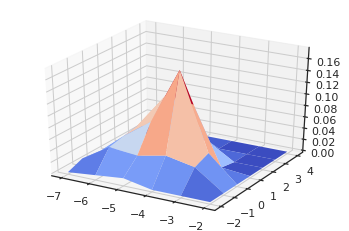

In [22]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(A1.x, A3.x, 1)
Y = np.arange(A4.y, A2.y, 1)
Z = np.zeros(((len(Y), len(X))))
X, Y = np.meshgrid(X, Y)
for xv,yv in surface_points:
    ix, iy = int(xv-A1.x),int(yv-A4.y)
    Z[iy,ix]+=1

Z=Z/K
print(Z)
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0)

plt.show()